# Анализ распространенных яблочных заболеваний(Яблочная парша, Огневка, Тресковая моль, Тля на яблоне) и разработка модели описывающая созренвание опасных организмов. #

## 1. Введение ##



Целью данной работы является анализ литературных данных для описания и предсказывания процентного количества яблочных "недугов"

Основная информация была взята [здесь](https://metos.at/ru/disease-models-apple/#)

## 2. Анализ основных заболеваний, а также построение моделей на базе полученной информации. ##

Импорт библиотек:

In [3]:
import math
import matplotlib.pyplot as plt
from random import randint
import seaborn as sns
import statistics

## 2.1 Яблочная парша ##

Информация взята тут: <https://translated.turbopages.org/proxy_u/en-ru.ru.eaa0b6cc-64c8e3f9-35b95bff-74722d776562/https/pubmed.ncbi.nlm.nih.gov/18944849/>

СЭТ(Сумма эффективных температур): С=(Т-П)*н, где Т - наблюдаемая температура, П - нижний порог развития, н - продолжительность периода развития. 

Формула минимальных благоприятных условий для формирования акроспор

Описание.

```
 for i in range(60):
        sum_temp += temp[-i-1]
```
 - овтечает за то, чтобы список `sum_temp` пролистывлся с конца, а затем суммировался, 60 - так как в статье сказано, что длительность условия 1440 часов или же 60 дней.

 `condition_formation = sum_temp - 10 * 60` - нужно чтобы температуры за последние 60 дней была выше 10 градусов. Формула в боллее приятном виде: $$условие формирования = суммарная температура - 10*60$$

```
 if condition_formation > 0:
        beginning_formation = 1
        return beginning_formation
    else: beginning_formation = 0
    return beginning_formation
```
- если `condition_formation`  больше 10 граусов в течении 60 дней, условие выполняется споры формируются - возвращаем 1. Если `condition_formation` меньше 10 градусов в течении 60 дней, условие не выполняется и споры не формируются - возвращаем 0

In [26]:

def apple_parsha_spore_formation_surviving(temp):
    sum_temp = 0
    for i in range(60):
        sum_temp += temp[-i-1]
    condition_formation = sum_temp - 10 * 60
    if condition_formation > 0:
        beginning_formation = 1
        return beginning_formation
    else: beginning_formation = 0
    return beginning_formation

```
temp = []
for i in range(60):
    temp.append(randint(1, 30)) 
```
 - цикл c рандомными положительными числами для входных данных(температура).

`apple_parsha_spore_formation_surviving(temp)` - проверка функции с положительными числами

In [27]:
temp = []
for i in range(60):
    temp.append(randint(1, 30)) 
apple_parsha_spore_formation_surviving(temp)

1

```
temp = []
for i in range(60):
    temp.append(randint(-30, 1)) 
```
 - цикл c рандомными отрицательными числами для входных данных(температура).

`apple_parsha_spore_formation_surviving(temp)` - проверка функции с отрицательными числами

In [16]:
temp = []
for i in range(60):
    temp.append(randint(-30, 1)) 
apple_parsha_spore_formation_surviving(temp)

0

Информация взята тут: <https://studbooks.net/1104519/agropromyshlennost/metody_ucheta_rasprostranyonnosti_razvitiya_bolezney>

https://www.pesticidy.ru/%D0%9F%D0%B0%D1%80%D1%88%D0%B0_%D1%8F%D0%B1%D0%BB%D0%BE%D0%BD%D0%B8

На основе данных выведена скорость прорастания спор в процентном соотношении

Споры прорастают только при влажности выше 70% и температуре от 0°C до 30°C.

Функция, которая лежит в основе алгоритма: 
$$
f(t)= \left\{ 
\begin{array}{c}
t * {100\over 19}, & t ∈ (0;19] \\ 
-t*{3000\over 330} + {3000\over 11}, & t ∈ (19;30) \\
-1, & t ∈ (-\infty; 0] ⋃ [30; +\infty)
\end{array}
\right.
$$ 

t - среднесуточная температура за сегодня

Функция выдает -1 когда никто не размножается

In [3]:
def time_to_grow(hum,temp):
    if hum > 70 and temp > 0 and temp <= 19: # если условие выполняется, то зависимость линейна от температуры
        percent_growth = temp * 100/19
        return percent_growth
    else: 
        if hum > 70 and temp > 19 and temp < 30:
            percent_growth = -temp * 3000/330 + 3000/11
            return percent_growth
        else: percent_growth = -1 #temp * 5.07
        return percent_growth

Тест:

In [26]:
temp = [7, 15.5, 13.5, 15.5, 10.5, 6.8, 8.5, 11.5, 15, 16.5, 17, 20.5, 22.5, 17, 20, 20, 22.5, 24.5, 16.5, 15, 16, 15.5, 15.5, 21.5, 21, 24, 21.5, 15.5, 21.5, 22, 9, 22, 21.5, 6, 15.5, 17.5, 18, 22, 23, 24, 16.5, 17.5, 19.5, 22, 25, 27.5, 28, 28, 25, 23.5, 23, 22, 27, 17, 17.5, 22.5, 24, 22, 17, 21.5, 20, 25.5, 23, 24.5, 27.5, 23.5, 23.5, 25, 17.5, 15, 16, 16.5, 14.5, 15.5, 23.5, 28, 27.5, 19, 21, 21, 22.5, 18.5, 14, 24, 25, 24.5, 25.5, 14.5, 23.5, 27]

growth_rate = []
for i in range(len(temp)):    
    percent = round(time_to_grow(75,temp[i]),2)
    growth_rate.append(percent)
growth_rate

[36.84,
 81.58,
 71.05,
 81.58,
 55.26,
 35.79,
 44.74,
 60.53,
 78.95,
 86.84,
 89.47,
 86.36,
 68.18,
 89.47,
 90.91,
 90.91,
 68.18,
 50.0,
 86.84,
 78.95,
 84.21,
 81.58,
 81.58,
 77.27,
 81.82,
 54.55,
 77.27,
 81.58,
 77.27,
 72.73,
 47.37,
 72.73,
 77.27,
 31.58,
 81.58,
 92.11,
 94.74,
 72.73,
 63.64,
 54.55,
 86.84,
 92.11,
 95.45,
 72.73,
 45.45,
 22.73,
 18.18,
 18.18,
 45.45,
 59.09,
 63.64,
 72.73,
 27.27,
 89.47,
 92.11,
 68.18,
 54.55,
 72.73,
 89.47,
 77.27,
 90.91,
 40.91,
 63.64,
 50.0,
 22.73,
 59.09,
 59.09,
 45.45,
 92.11,
 78.95,
 84.21,
 86.84,
 76.32,
 81.58,
 59.09,
 18.18,
 22.73,
 100.0,
 81.82,
 81.82,
 68.18,
 97.37,
 73.68,
 54.55,
 45.45,
 50.0,
 40.91,
 76.32,
 59.09,
 27.27]

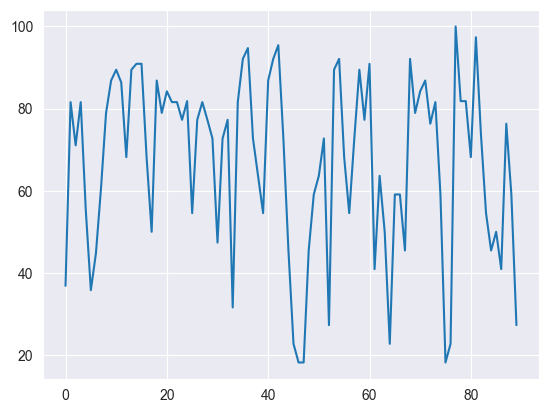

In [28]:
time = [i for i in range(90)]
plt.plot(time, growth_rate, linestyle='-')
plt.show()

Информация взята тут: <http://berrylib.ru/books/item/f00/s00/z0000040/st004.shtml>

На основе данных выведена функция описывающая зависимость длины инкубационного периода от температуры

Входными данными является список из среднесуточных температур, снятых с датчика.
```
temp = []
for i in range(20):
    temp.append(randint(-30, 30))
```
 - симмуляция списка среднесуточных температур.

 `mean = (temp[-1]+temp[-2]+temp[-3]+temp[-4]+temp[-5]) / 5` - находим среднее значение тмпературы за последние 5 дней.

Условия для работоспособности зависисмости:    $$0 > mean > 25$$  (mean - средняя температура за последние 5 дней)

Функция зависимости:  

 $$
f(m)= \left\{ 
\begin{array}{c}
|24 - m| * {2\over 3} + 6, & m ∈ (0;25] \\ 
-1, & m ∈ (-\infty; 0] ⋃ (25; +\infty)
\end{array}
\right.
$$

m - mean -  средняя температура за последние 5 дней.

In [4]:
temp = []
for i in range(20):
    temp.append(randint(-30, 30))
def parshas_incubation_period(temp):
    #mean = (temp[-1]+temp[-2]+temp[-3]+temp[-4]+temp[-5]) / 5
#    if mean > 0 and mean <= 25:
#        len_incubation_period = abs((24-mean)*2 / 3) + 6
#        return len_incubation_period
#    else: 
#        return -1
    if temp > 0 and temp <= 25:
        len_incubation_period = abs((24-temp)*2 / 3) + 6
        return len_incubation_period
    else: 
        return -1

In [5]:
temp = [7, 15.5, 13.5, 15.5, 10.5, 6.8, 8.5, 11.5,
        15, 16.5, 17, 20.5, 22.5, 17, 20, 20, 22.5, 24.5, 
        16.5, 15, 16, 15.5, 15.5, 21.5, 21, 24, 21.5, 15.5, 
        21.5, 22, 9, 22, 21.5, 6, 15.5, 17.5, 18, 22, 23, 24, 
        16.5, 17.5, 19.5, 22, 25, 27.5, 28, 28, 25, 23.5, 23, 
        22, 27, 17, 17.5, 22.5, 24, 22, 17, 21.5, 20, 25.5, 23,
        24.5, 27.5, 23.5, 30, 30, 23.5, 25, 17.5, 15, 16, 16.5,
        14.5, 15.5, 23.5, 28, 27.5, 19, 21, 21, 22.5, 18.5, 14,
        24, 25, 24.5, 25.5, 14.5, 23.5, 27]

incubation_time = []
for i in range(len(temp)):    
    percent = round(parshas_incubation_period(temp[i]),2)
    incubation_time.append(percent)
incubation_time

[17.33,
 11.67,
 13.0,
 11.67,
 15.0,
 17.47,
 16.33,
 14.33,
 12.0,
 11.0,
 10.67,
 8.33,
 7.0,
 10.67,
 8.67,
 8.67,
 7.0,
 6.33,
 11.0,
 12.0,
 11.33,
 11.67,
 11.67,
 7.67,
 8.0,
 6.0,
 7.67,
 11.67,
 7.67,
 7.33,
 16.0,
 7.33,
 7.67,
 18.0,
 11.67,
 10.33,
 10.0,
 7.33,
 6.67,
 6.0,
 11.0,
 10.33,
 9.0,
 7.33,
 6.67,
 -1,
 -1,
 -1,
 6.67,
 6.33,
 6.67,
 7.33,
 -1,
 10.67,
 10.33,
 7.0,
 6.0,
 7.33,
 10.67,
 7.67,
 8.67,
 -1,
 6.67,
 6.33,
 -1,
 6.33,
 -1,
 -1,
 6.33,
 6.67,
 10.33,
 12.0,
 11.33,
 11.0,
 12.33,
 11.67,
 6.33,
 -1,
 -1,
 9.33,
 8.0,
 8.0,
 7.0,
 9.67,
 12.67,
 6.0,
 6.67,
 6.33,
 -1,
 12.33,
 6.33,
 -1]

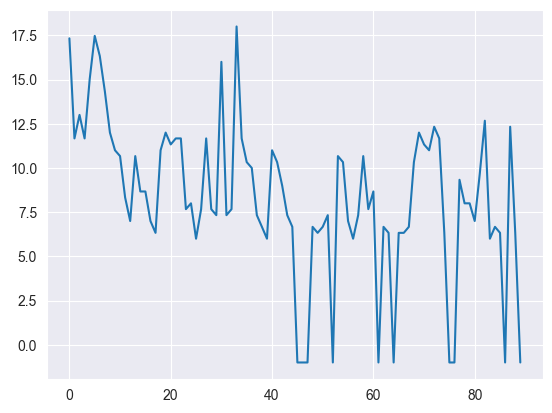

In [35]:
time = [i for i in range(90)]
plt.plot(time, incubation_time, linestyle='-')
plt.show()

```
temp = []
for i in range(20):
    temp.append(randint(-30, 30)) 
```

- симмуляция списка среднесуточных температур.

`parshas_incubation_period (temp)` - тест

In [19]:
temp = []
for i in range(20):
    temp.append(randint(-30, 30)) 
parshas_incubation_period (temp)

-1

```
temp = []
for i in range(20):
    temp.append(randint(1, 30)) 
```

- симмуляция списка среднесуточных температур.

`parshas_incubation_period (temp)` - тесты, при положительных числах

In [20]:
temp = []
for i in range(20):
    temp.append(randint(1, 30)) 
parshas_incubation_period (temp)

8.533333333333333

In [106]:
temp = []
for i in range(20):
    temp.append(randint(1, 30)) 
parshas_incubation_period (temp)

14.799999999999999

In [107]:
temp = []
for i in range(20):
    temp.append(randint(1, 30)) 
parshas_incubation_period (temp)

13.466666666666665

In [108]:
temp = []
for i in range(20):
    temp.append(randint(1, 30)) 
parshas_incubation_period (temp)

8.0

Информация взята тут: <https://www.pesticidy.ru/%D0%9F%D0%B0%D1%80%D1%88%D0%B0_%D1%8F%D0%B1%D0%BB%D0%BE%D0%BD%D0%B8>

На основе данных построена функция описывающая влияние температуры на время прорастания спор

Для прорастания спор нужно следующее:

 влажность больше 80%: $$ hum < 80 $$

 а также, температура в диапазоне от 2°C до 30°C:  $$ 2 < temp < 30 $$

 Если условия будут выполнены, споры будут прорастать, в противном случае прорастания спор происходить не будет и мы возвращаем 0.

 Функция зависимости: 

 $$
f(t)= \left\{ 
\begin{array}{c}
|18 - t| * {1\over 3} + 4, & t ∈ (2;30) \\ 
0, & t ∈ (-\infty; 2] ⋃ [30; +\infty)
\end{array}
\right.
$$

t - среднесуточная температура

In [110]:
def penetration_of_plant(hum,temp):
    if hum < 80 or temp < 2 or temp > 30 :
        return 0
    else: time_penetration = abs((18-temp) / 3) + 4
    return time_penetration

Тест

In [ ]:
penetration_of_plant(70,20)

0

Тест

In [111]:
penetration_of_plant(90,5)

8.333333333333332

Тест

In [112]:
penetration_of_plant(90,9)

7.0

Тест

In [114]:
penetration_of_plant(90,12)

6.0

Тест

In [115]:
penetration_of_plant(90,15)

5.0

Тест

In [117]:
penetration_of_plant(90,18)

4.0

Тест

In [119]:
penetration_of_plant(90,21)

5.0

---

## 2.2 Огненная вспышка ##

Информация взята тут: <https://antonovsad.ru/ognevka-na-ryabine-yablone-grushe-i-boyaryshnike-2962/>

<https://cyberleninka.ru/article/n/osobennosti-razvitiya-samshitovoy-ognevki-cydalima-perspectalis-walker-v-laboratornoy-kulture>

<http://journalkubansad.ru/pdf/17/02/08.pdf>

Условия для заражения (при выполнении этих условий заражение происходит в течении нескольких минут)

Для заражения нужно следующее:

 влажность больше 90% (обычно после дождя или обильной росой) : $$ hum < 90 $$

 а также, температура не меньше 16°C:  $$ temp ≥ 30 $$

 Если условия будут выполнены, передадим 1

 Если эти условия выполнены не будут, заражения не произойдет мы передадим 0

In [22]:
def infection_conditions (hum,temp):
    if hum >90 and temp >= 16:
        return 1
    else: return 0
    

Тест

In [20]:
infection_conditions(95,17)

1

Тест

In [23]:
infection_conditions(95,14)

0

Тест

In [22]:
infection_conditions(55,17)

0

Тест

In [24]:
infection_conditions(45,11)

0

Зная в какой день появились первые симптомы заражения и температуру прошлых дней, можно узнать когда произошло заражение.

Входные параметры.

days - количество дней прошло с предполагаемого заражения.

temp - список состоящий из среднесуточной температуры за какое то время.

```
for i in range(days):
        sum_temp += temp[-i-1]
```
- в этой части кода мы суммируем последние температуры, а количество температур задает параметр days.

Формула по которо идет определение, можно ли было заразится за количство дней days при температурах temp:
$$graddays = sumtemp - 13 * days$$

sumtemp - сумма тмператур за последние days - дней.

days - количество дней прошло с предполагаемого заражения.(число 13 в формуле взято, так как нам необходимо, чтобы за последние дни тмпература была выше этого значения, в среднем)

gradday - результат расчетов, который должен быть не меньше 57, так как накопление  именно такого значения означает появление симптомов.

Если функция вывела 1 - значит за это время и за эти температуры могли появится симптомы, если 0 - значит не могли.

In [24]:

def symptoms(days, temp): ###зависимости от дневных температур, может занять от 5 до 30 календарных дней.
    grad_day = 0
    sum_temp = 0
    for i in range(days):
        sum_temp += temp[-i-1]
        grad_days = sum_temp - 13 * days
    if grad_days >= 57:
        return 1
    else: return 0

Тест

Обратите винмание, что последующие 2 теста отличаются последним элементом, тем самым я проверил граничное значение, равное 57.

In [25]:
temp = [1,2,3,4,5,6,7,8,9,10,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16]

symptoms(19,temp)

1

Тест

In [12]:
temp = [1,2,3,4,5,6,7,8,9,10,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,15]

symptoms(19,temp)

0

Зависимость количества гусениц от съеденых листьев

Из входных данных масса съеденных листьев, которые мы делим на 60.

$$n = m/60$$

n - количество гусениц.

m - масса листьев(в граммах).

In [27]:
def papulation_hibernating_caterpillars(mass_leaves_eaten):# масса листьев в граммах
    count_caterpillars = round(mass_leaves_eaten / 60)
    return count_caterpillars

Тест

In [29]:
papulation_hibernating_caterpillars(3640)

61

Информация взята тут: <https://antonovsad.ru/ognevka-na-ryabine-yablone-grushe-i-boyaryshnike-2962/>

<https://cyberleninka.ru/article/n/osobennosti-razvitiya-samshitovoy-ognevki-cydalima-perspectalis-walker-v-laboratornoy-kulture>

<http://journalkubansad.ru/pdf/17/02/08.pdf>

Условия для откладки яиц

Входные данные.

temp = среднесуточная температура, которая должна бы в области от 18°C до 40°C.

$$18 < temp < 40$$

sun_time - количество солнечного света, которое должно быть меньше 8 часов.

$$ suntime < 8 $$

Если функция возвращает 1 - значит откладка яиц происходит, если 0 - то откладки нет.

In [37]:
def egg_laying(temp, sun_time):
    if temp < 18 or temp > 40 or sun_time > 8:
        egg_supply_laying = 0
    else: egg_supply_laying = 1 #0,876
    return egg_supply_laying

Тест

In [38]:
egg_laying(12,9)

0

Тест

In [39]:
egg_laying(20,4)

1

Тест

In [40]:
egg_laying(41,6)

0

Тест

In [41]:
egg_laying(17,4)

0

---

## 2.3 Тресковая Моль (Плодожорка) ##

СЭТ(Сумма эффективных температур): С=(Т-П)*н, где Т - наблюдаемая температура, П - нижний порог развития, н - продолжительность периода развития. 

Информацция взята тут:<https://direct.farm/post/osobennosti-monitoringa-yablonnoy-plodozhorki-8501>

<https://earthpapers.net/biologicheskoe-obosnovanie-tehnologii-regulirovaniya-chislennosti-yablonnoy-plodozhorki-cydia-pomonella-l-v-usloviyah-kra>

<https://www.greeninfo.ru/protection_plants/index/jablonnaja-plodozhorka_art.html>

In [163]:
#temp = []#массив из средних температур в день
#def caterpillar_pupation(temp):
 #   set = temp.sum - 10 * len(temp)
  #  if 48 >= set:
   #     pupation_rate < 32
    #if 48 <= set <= 65:
     #   pupation_rate = 32
    #if 94 <= set <= 117:
     #   pupation_rate = 62
    #if 147 <= set <= 160:
     #   pupation_rate = 75
    #if set >= 65:
     #   pupation_rate = 100
    #return papulation_rate    

Условия для появления тресковой моли

temp - список среднесутчной температуры за последнее время.

`set = sum(temp) - 10 * len(temp)` - улсовие при котором появится моль.

sum(temp) - сумма всех температур за последнее время.

len(temp) - количество дней(10 - это температура, выше которой должна быть среднесуточная).

set - результат, который должен быть не меньше 230. Если результат выше 230, это означает пояление тресковой моли, значит передаем 1. Если set меньше 230, то моль не появится, значит передаем 0

In [42]:
temp = []#массив из средних температур в день
def presence_of_moth (temp):
    set = sum(temp) - 10 * len(temp)
    if set >= 230:
        moth_presence = 1
        return moth_presence
    else: moth_presence = 0
    return moth_presence

Тест

In [51]:
temp = [33,33,33,33,33,33,33,33,33,32]
presence_of_moth(temp)

0

Тест

In [52]:
temp = [33,33,33,33,33,33,33,33,33,33]
presence_of_moth(temp)

1

Информация вязта тут: <https://fermer.ru/sovet/sadovodstvo/126479>

при выполнении условия начинается развитие плодожорки

Входные данные.

days - количество дней.

temp - среднесуточная температура, берется за days - дней.
```
    for i in range(days):
        sum_temp += temp[-i-1]
```
- суммируем поледние days - дней.

Основная Формула: 

$$ graddays = sumtemp - 10 * days $$

sumtemp - суммарная температура за days - дней

days - количество дней(10 - минимальная температура)

grad_days - результат, который должен быть не меньше 130, чтобы из куколки отродилась бабочка, тогда передаем 1, если меньше 130, то передаем 0.

In [31]:
def butterfly_roast(days, temp): 
    sum_temp = 0
    for i in range(days):
        sum_temp += temp[-i-1]
        grad_days = sum_temp - 10 * days
    if grad_days >= 130:
        return 1 #из куколки отрождается бабочка
    else: return 0

Тест

In [32]:
temp = [23,23,23,23,23,23,23,23,23,22]
butterfly_roast(10,temp)

0

Тест

In [59]:
temp = [23,23,23,23,23,23,23,23,23,23]
butterfly_roast(10,temp)

1

Информация вязта тут: <https://fermer.ru/sovet/sadovodstvo/126479>

условия для проникновения в фрукт

Входные данные.

days - количество дней.

temp - среднесуточная температура, берется за days - дней.
```
    for i in range(days):
        sum_temp += temp[-i-1]
```
- суммируем поледние days - дней.

Основная Формула: 

$$ graddays = sumtemp - 10 * days $$

sumtemp - суммарная температура за days - дней

days - количество дней(10 - минимальная температура)

grad_days - результат, который должен быть не меньше 230, чтобы моль попала в плод, тогда передаем 1, если меньше 230, то передаем 0.

In [62]:
temp = [1,2,3,4,5,6,7,8,9,10]
def fruit_penetration(days, temp): 
    grad_day = 0
    sum_temp = 0
    for i in range(days):
        sum_temp += temp[-i-1]
        grad_days = sum_temp - 10 * days
    if grad_days >= 230:
        return 1 #из куколки отрождается бабочка
    else: return 0

Тест

In [63]:
temp = [33,33,33,33,33,33,33,33,33,33]
fruit_penetration(10,temp)

1

Тест

In [64]:
temp = [33,33,33,33,33,33,33,33,33,32]
fruit_penetration(10,temp)

0

Скорость откладки яиц в процентном отношениия

Входные данные.

temp - температура.

Функция, которая лежит в основе алгоритма: 
$$
f(t)= \left\{ 
\begin{array}{c}
t * {100\over 7} - {1000\over 7}, & t ∈ (10;17] \\ 
-t*{100\over 15} + {640\over 3}, & t ∈ (17;30) \\
-1, & t ∈ (-\infty; 10] ⋃ [30; +\infty)
\end{array}
\right.
$$ 

t - среднесуточная температура за сегодня

Функция выдает -1 когда никто не размножается

In [29]:
def laying_rate_moth(temp):
    if temp > 10 and temp <= 17:
        percent_laying = temp * 100/7 - 1000/7
        return percent_laying
    else: 
        if temp > 17 and temp < 30:
            percent_laying = -temp * 100/15 + 640/3
            return percent_laying
        else: percent_laying = -1 
        return percent_laying

Тест

In [66]:
laying_rate_moth(11)

14.285714285714278

Тест

In [30]:
laying_rate_moth(14)

57.14285714285714

Тест

In [69]:
laying_rate_moth(17)

100.0

Тест

In [71]:
laying_rate_moth(20)

80.0

Тест

In [72]:
laying_rate_moth(23)

60.0

Тест

In [73]:
laying_rate_moth(26)

40.0

Тест

In [74]:
laying_rate_moth(29)

20.0

## 2.4 Тля на яблонях ##

Информацция взята тут:<https://metos.at/ru/disease-models-apple/#>

При выполнении этих условий происходит заражение

При комфортной влажности(hum) происходит заражение, условия для комфортной влажности:

$$ 30 < hum < 95 $$

Если функция выдает 1 - происходит заражение, 0 - заражения нет.

In [79]:
def comfort_hum(hum):
    if 30 < hum < 95:
        infect = 1
        return infect
    else: infect = 0
    return infect

Тест

In [80]:
comfort_hum(15)

0

Тест

In [81]:
comfort_hum(35)

1

Тест

In [83]:
comfort_hum(96)

0

При выполнении этих условий происходит заражение

При комфортной температуре(temp) происходит заражение, формула для комфортной температуры:

$$ 20 < temp < 32 $$

Если функция выдает 1 - происходит заражение, 0 - заражения нет.

In [88]:
def comfort_temp(temp):
    if 20 < temp < 32:
        infect = 1
        return infect
    else: infect = 0
    return infect

Тест

In [89]:
comfort_temp(15)

0

Тест

In [90]:
comfort_temp(25)

1

Тест

In [92]:
comfort_temp(35)

0

Информация взята тут: <https://tulrb.ru/info/interesnoe/pri-kakoj-temperature-pogibaet-tlya>

Скорость откладки яиц в процентном соотношении

Входные данные.

temp - температура.

Функция, которая лежит в основе алгоритма: 
$$
f(t)= \left\{ 
\begin{array}{c}
t * 5 - 25, & t ∈ (5;25] \\ 
-t*{100\over 7} + {3200\over 7}, & t ∈ (25;32) \\
-1, & t ∈ (-\infty; 5] ⋃ [32; +\infty)
\end{array}
\right.
$$ 

t - среднесуточная температура за сегодня

Функция выдает -1 когда никто не размножается

In [120]:
def laying_rate_Aphids (temp):
    if temp > 5 and temp <= 25:
        percent_laying = temp * 5 - 25
        return percent_laying
    else: 
        if temp > 25 and temp < 32:
            percent_laying = -temp * 100/7 + 3200/7
            return percent_laying
        else: percent_laying = -1 
        return percent_laying

Тест

In [121]:
laying_rate_Aphids(6)

5

Тест

In [122]:
laying_rate_Aphids(10)

25

Тест

In [123]:
laying_rate_Aphids(15)

50

Тест

In [124]:
laying_rate_Aphids(20)

75

Тест

In [125]:
laying_rate_Aphids(25)

100

Тест

In [127]:
laying_rate_Aphids(31)

14.285714285714334

## 5. Общий вывод ##



На все болезни были найдены необходимые данные для методов предсказания угрозы для яблонь. Также у каждой болезни были выведены формулы. Однако для "Яблочной тли" было найдено меньше материала по сравнению с другими вредителями.